In [59]:
#Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [60]:
# define path
path = r'/Users/amykillin/Desktop/Mark Career Foundry Data/Data Immersion/Topic 4/Instacart Basket Analysis'

In [61]:
# import dataframe
df = pd.read_pickle(os.path.join(path, '2 Data', 'Prepared Data', 'ords_prods_customer_merge_4.9_part_one.pkl'))

In [64]:
# Checking columns are all there from the previous exercise.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   prices                  float64
 5   Unnamed: 0_y            int64  
 6   order_id                int64  
 7   user_id                 int64  
 8   eval_set                object 
 9   order_number            int64  
 10  order_dow               int64  
 11  order_hour_of_day       int64  
 12  days_since_prior_order  object 
 13  add_to_cart_order       int64  
 14  reordered               int64  
 15  price_range_loc         object 
 16  busiest_day             object 
 17  busiest_days            object 
 18  busiest_period_of_day   object 
 19  max_order               int64  
 20  loyalty_flag            object 
 21  average_price           float

<Axes: >

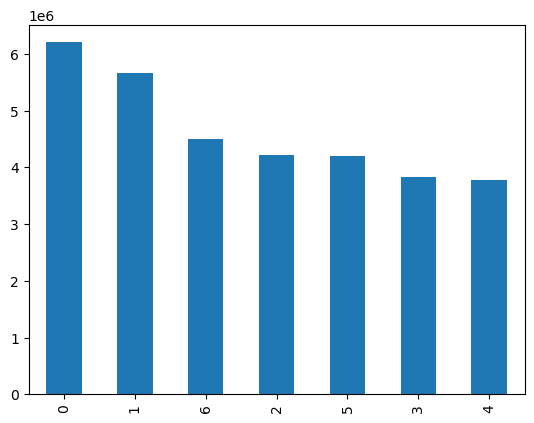

In [65]:
# Createing BarChart

df['order_dow'].value_counts().plot.bar()

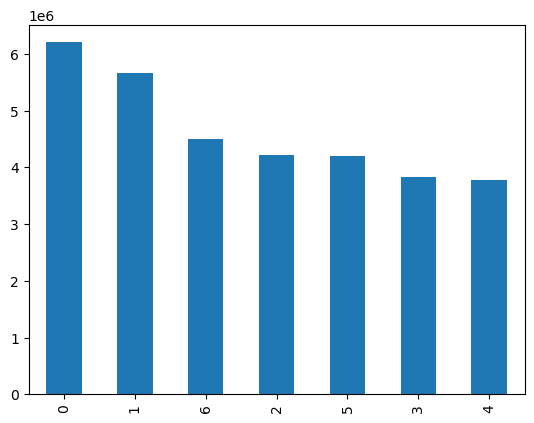

In [103]:
# Testing the bar chart in the table format Monday to Sunday (0-6)

bar = df['order_dow'].value_counts().plot.bar()

In [104]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_orders_dow.png'))

In [67]:
bar

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: order_dow, dtype: int64

<Axes: ylabel='Frequency'>

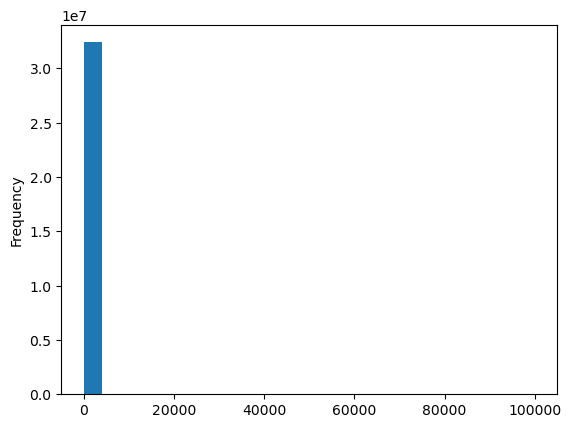

In [68]:
df['prices'].plot.hist(bins = 25)

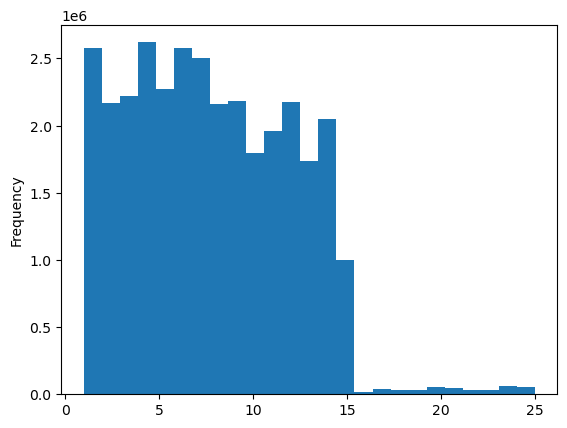

In [105]:
hist_prices = df['prices'].plot.hist(bins = 25)

In [111]:
#Export

hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_prices.png'))

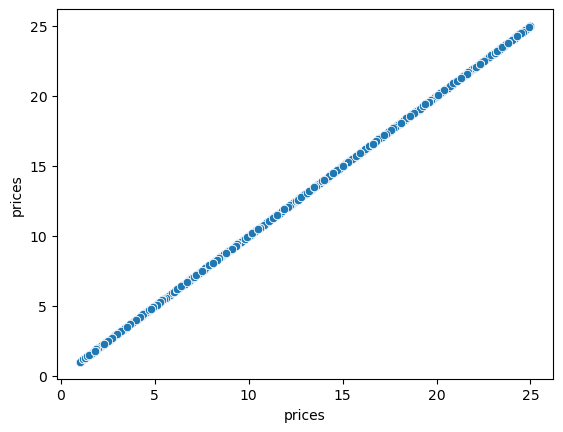

In [108]:
# Creating Scatterplot of the prices

scatter_price = sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [110]:
# Export

scatter_price.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'scatter_price.png'))

In [70]:
# Investigating outliers

df.loc[df['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,user_id,eval_set,order_number,...,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,first_name,surname,age,number_of_dependants,spending_power
23024,33664,2 % Reduced Fat Milk,84,16,99999.0,720250,1489110,43360,prior,3,...,Regular customer,855.954140,High spender,8.0,Frequent customer,Marilyn,Baker,67,3,149199
23025,33664,2 % Reduced Fat Milk,84,16,99999.0,720251,2322035,43360,prior,4,...,Regular customer,855.954140,High spender,8.0,Frequent customer,Marilyn,Baker,67,3,149199
23026,33664,2 % Reduced Fat Milk,84,16,99999.0,720252,420339,43360,prior,5,...,Regular customer,855.954140,High spender,8.0,Frequent customer,Marilyn,Baker,67,3,149199
23027,33664,2 % Reduced Fat Milk,84,16,99999.0,720254,2912515,43360,prior,7,...,Regular customer,855.954140,High spender,8.0,Frequent customer,Marilyn,Baker,67,3,149199
28712,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,901306,518829,54136,prior,22,...,Regular customer,98.685276,High spender,14.0,Regular customer,Benjamin,Parsons,40,0,160524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32383871,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,2273587,3288900,136909,prior,1,...,Regular customer,1154.823077,High spender,6.0,Frequent customer,Deborah,Dillon,30,2,161606
32383872,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,2273590,285306,136909,prior,4,...,Regular customer,1154.823077,High spender,6.0,Frequent customer,Deborah,Dillon,30,2,161606
32383873,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,2273599,2744314,136909,prior,13,...,Regular customer,1154.823077,High spender,6.0,Frequent customer,Deborah,Dillon,30,2,161606
32396750,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,43906,2716179,2700,prior,7,...,Regular customer,831.905556,High spender,2.0,Frequent customer,Charles,Crosby,67,0,225873


In [71]:
# Removing outlier price values

df.loc[df['prices'] >100, 'prices'] = np.nan

In [72]:
# Investigating outliers second attempt

df.loc[df['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,user_id,eval_set,order_number,...,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,first_name,surname,age,number_of_dependants,spending_power


In [73]:
# Outlier price values removed

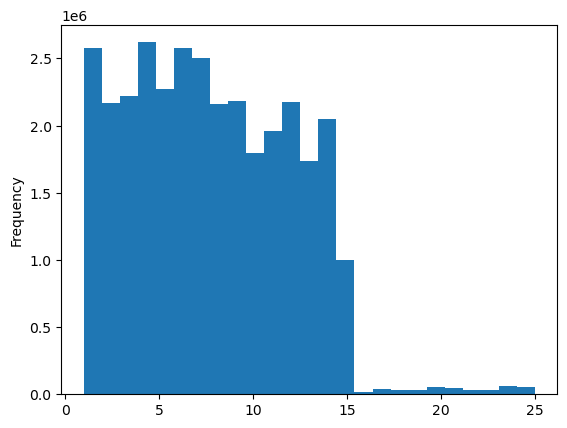

In [112]:
# Repeating histogram minus high price values

hist_prices = df['prices'].plot.hist(bins = 25)

In [115]:
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_prices.png'))

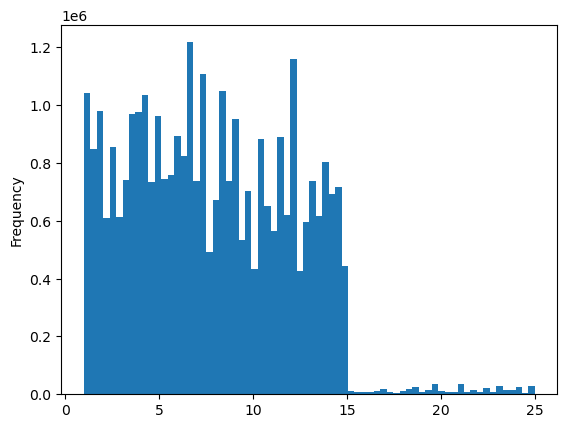

In [113]:
# Histogram same as above but with 70 bins

hist_prices_2 = df['prices'].plot.hist(bins = 70)

In [116]:
hist_prices_2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_prices_2.png'))

In [76]:
# Create a list holding true/ false values to the test np.random.rant() <= 0.7

dev = np.random.rand(len(df)) <= 0.7

In [77]:
# Store 70% of the sample in the dataframe big

big = df[dev]

In [78]:
# Store 30% of the sample in the dataframe small

small = df[~dev]

In [79]:
df_2 = small[['order_dow','prices']]

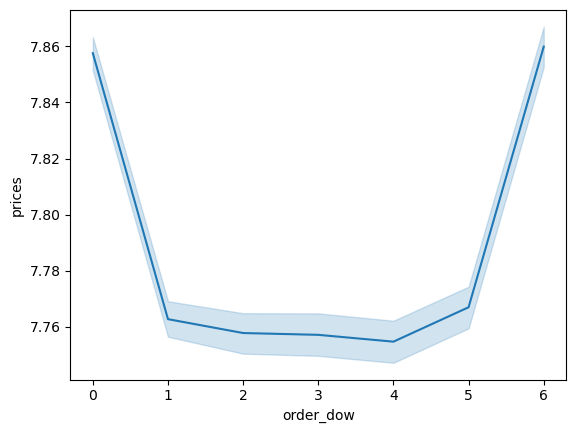

In [80]:
# Create linechart

line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')

In [117]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_price_dow.png'))

# Questions
# Part 2, Question 3

In [81]:
# You need to provide the Instacart senior stakeholders with descriptive findings about sales. 
# Create a histogram of the “order_hour_of_day” column.

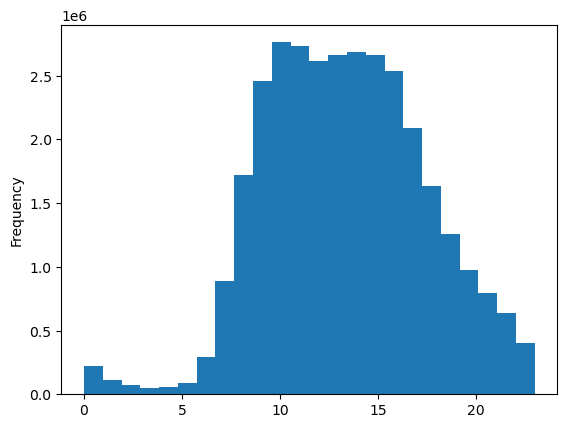

In [82]:
hist_order_hour_of_day = df['order_hour_of_day'].plot.hist(bins = 24)
#24 hours in 1 day, therefore logical to limit to 24 bins

In [118]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_order_hour_of_day.png'))

In [83]:
# Very few orders are placed between midnight and 5am
# The orders gradually increase from 5am until 10am, where we see the peak until around 3/4 pm. 
# The order volume themn decrerases until midnight again.

# Question 4

In [84]:
# The marketing team is curious about the distribution of orders among customers in terms of loyalty. 
# Create a bar chart from the “loyalty_flag” column.

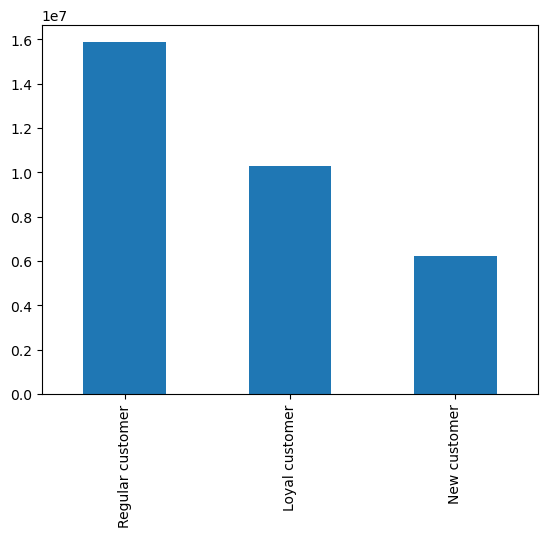

In [85]:
# Bar chart for loyalty flag customers
bar_loyalty_flag = df['loyalty_flag'].value_counts().plot.bar()

In [119]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_loyalty_flag.png'))

# Question 5

Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [86]:
# Already defined 'small' previously
# Define new df to display 'order_hour_of_day'

df_3 = small[['order_hour_of_day','prices']]

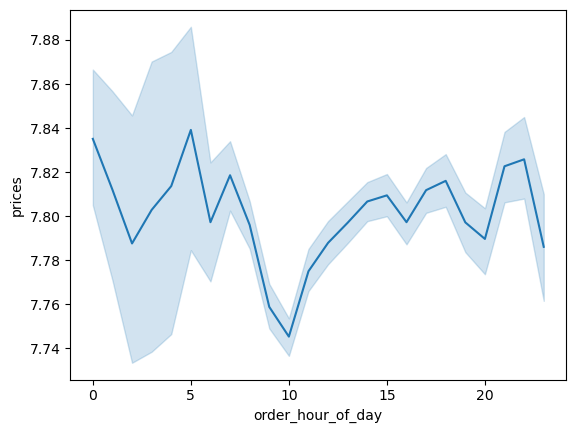

In [87]:
line_price_hour = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [121]:
line_price_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_price_hour.png'))

In [88]:
# Observation: there is a decisive price pattern between 8am and 5pm
# Between midnight and 8am, there is an indecisive expenditure.

# Question 6

Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns.
First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [89]:
df_4 = small[['age','number_of_dependants']]

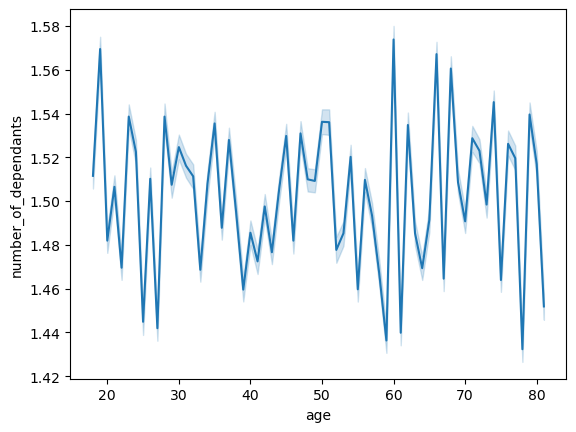

In [90]:
line_age_dependants = sns.lineplot(data = df_4, x = 'age',y = 'number_of_dependants')

In [122]:
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_age_dependants.png'))

In [91]:
# Not much of a trend or discernable pattern here, ranges between 1.43 and 1.58 on average

# Question 7

You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [92]:
df_5 = small[['age','spending_power']]

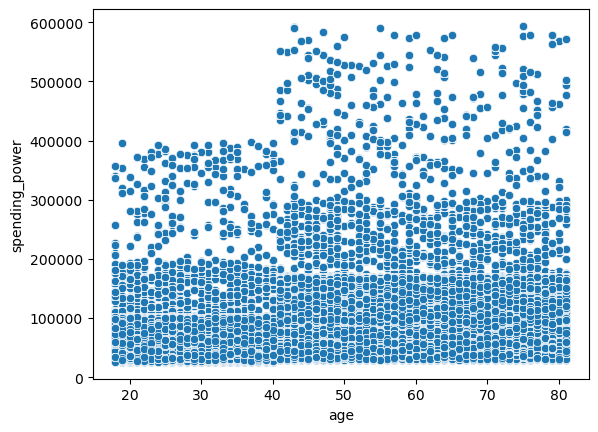

In [94]:
scatter_age_spending_power = sns.scatterplot(data = df_5, x = 'age', y = 'spending_power')

In [123]:
scatter_age_spending_power.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'scatter_age_spending_power.png'))

In [98]:
# 1 - This shows it's most common to have up to 100K across all age groups
# 2 - The next tier is less dispersed for 100k-200K for the 20-40 year olds and 200K-300K for the over 40 year olds
# 3 - Much less common for the 20-40 year olds to earn 200-400K same as the 40 year olds to be earning 300K-600K

# Question 8

Export the charts

In [124]:
# Done